# Yelp Dataset Preprocessing for ENSFM (Notebook)

In [4]:
import json

# Create sets to store unique keys
user_keys = set()
business_keys = set()
review_keys = set()
tip_keys = set()
checkin_keys = set()

# Paths to the JSON files
user_path = 'yelp_user.json'
business_path = 'yelp_business.json'
review_path = 'yelp_review.json'
tip_path = 'yelp_tip.json'
checkin_path = 'yelp_checkin.json'

# Function to extract keys from a JSON file
def extract_keys(file_path, key_set):
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line:
                data = json.loads(line)
                key_set.update(data.keys())

# Extract keys from each file
extract_keys(user_path, user_keys)
extract_keys(business_path, business_keys)
extract_keys(review_path, review_keys)
extract_keys(tip_path, tip_keys)
extract_keys(checkin_path, checkin_keys)

# Print results
print("\n🔑 Keys in user JSON:")
for key in sorted(user_keys):
    print("-", key)

print("\n🔑 Keys in business JSON:")
for key in sorted(business_keys):
    print("-", key)

print("\n🔑 Keys in review JSON:")
for key in sorted(review_keys):
    print("-", key)

print("\n🔑 Keys in tip JSON:")
for key in sorted(tip_keys):
    print("-", key)

print("\n🔑 Keys in checkin JSON:")
for key in sorted(checkin_keys):
    print("-", key)



🔑 Keys in user JSON:
- average_stars
- compliment_cool
- compliment_cute
- compliment_funny
- compliment_hot
- compliment_list
- compliment_more
- compliment_note
- compliment_photos
- compliment_plain
- compliment_profile
- compliment_writer
- cool
- elite
- fans
- friends
- funny
- name
- review_count
- useful
- user_id
- yelping_since

🔑 Keys in business JSON:
- address
- attributes
- business_id
- categories
- city
- hours
- is_open
- latitude
- longitude
- name
- postal_code
- review_count
- stars
- state

🔑 Keys in review JSON:
- business_id
- cool
- date
- funny
- review_id
- stars
- text
- useful
- user_id

🔑 Keys in tip JSON:
- business_id
- compliment_count
- date
- text
- user_id

🔑 Keys in checkin JSON:
- business_id
- date


In [2]:
import json
from collections import defaultdict

# Function to flatten nested JSON structures (dicts or lists)
def flatten_json(y, prefix=""):
    out = {}
    if isinstance(y, dict):
        for key, value in y.items():
            new_key = f"{prefix}.{key}" if prefix else key
            out.update(flatten_json(value, new_key))
    elif isinstance(y, list):
        for i, item in enumerate(y):
            new_key = f"{prefix}[{i}]"
            out.update(flatten_json(item, new_key))
    else:
        out[prefix] = y
    return out

# Function to extract feature tokens by key from a file.
# It returns a dictionary: key -> set(tokens) for that key.
def extract_features_by_key(filepath, expected_keys):
    key_tokens = defaultdict(set)
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            try:
                record = json.loads(line)
            except json.JSONDecodeError:
                continue
            
            for key in expected_keys:
                if key in record:
                    val = record[key]
                    # If the value is a dict or list, flatten it to get subkeys
                    if isinstance(val, dict) or isinstance(val, list):
                        flat_dict = flatten_json(val, key)
                        for flat_key, flat_val in flat_dict.items():
                            token = f"{flat_key}={flat_val}"
                            key_tokens[key].add(token)
                    else:
                        token = f"{key}={val}"
                        key_tokens[key].add(token)
    return key_tokens

# Define the keys for users and businesses
user_keys = [
    "average_stars",
    "compliment_cool",
    "compliment_cute",
    "compliment_funny",
    "compliment_hot",
    "compliment_list",
    "compliment_more",
    "compliment_note",
    "compliment_photos",
    "compliment_plain",
    "compliment_profile",
    "compliment_writer",
    "cool",
    "elite",
    "fans",
    "friends",
    "funny",
    "name",
    "review_count",
    "useful",
    "user_id",
    "yelping_since"
]

business_keys = [
    "address",
    "attributes",
    "business_id",
    "categories",
    "city",
    "hours",
    "is_open",
    "latitude",
    "longitude",
    "name",
    "postal_code",
    "review_count",
    "stars",
    "state"
]

# Paths to the JSON files (ensure they are in the notebook's working directory)
user_path = 'yelp_user.json'
business_path = 'yelp_business.json'

# Extract features separately for users and businesses
user_features_by_key = extract_features_by_key(user_path, user_keys)
business_features_by_key = extract_features_by_key(business_path, business_keys)

# Print detailed counts for user components
print("Detailed counts for User features:")
total_user_features = set()
for key in user_keys:
    tokens = user_features_by_key.get(key, set())
    total_user_features.update(tokens)
    print(f"  {key}: {len(tokens)} unique tokens")

print(f"  Total unique user features: {len(total_user_features)}\n")

# Print detailed counts for business components
print("Detailed counts for Business features:")
total_business_features = set()
for key in business_keys:
    tokens = business_features_by_key.get(key, set())
    total_business_features.update(tokens)
    print(f"  {key}: {len(tokens)} unique tokens")

print(f"  Total unique business features: {len(total_business_features)}\n")

# Compute overall unique features across both users and businesses
all_features = total_user_features.union(total_business_features)
print(f"Overall unique feature count (#Feature): {len(all_features)}")


Detailed counts for User features:
  average_stars: 401 unique tokens
  compliment_cool: 1604 unique tokens
  compliment_cute: 308 unique tokens
  compliment_funny: 1604 unique tokens
  compliment_hot: 1312 unique tokens
  compliment_list: 193 unique tokens
  compliment_more: 352 unique tokens
  compliment_note: 1010 unique tokens
  compliment_photos: 1018 unique tokens
  compliment_plain: 1663 unique tokens
  compliment_profile: 345 unique tokens
  compliment_writer: 822 unique tokens
  cool: 4532 unique tokens
  elite: 1356 unique tokens
  fans: 691 unique tokens
  friends: 1091999 unique tokens
  funny: 3757 unique tokens
  name: 132361 unique tokens
  review_count: 1973 unique tokens
  useful: 5349 unique tokens
  user_id: 1987897 unique tokens
  yelping_since: 1980183 unique tokens
  Total unique user features: 5220730

Detailed counts for Business features:
  address: 122844 unique tokens
  attributes: 3669 unique tokens
  business_id: 150346 unique tokens
  categories: 83161 uni

## Categories of business

In [2]:
import json
from collections import Counter

category_counter = Counter()

with open('yelp_business.json', 'r', encoding='utf-8') as f:
    for line in f:
        data = json.loads(line)
        categories = data.get('categories')
        if categories:
            for cat in categories.split(','):
                category_counter[cat.strip()] += 1

# Sort by count
sorted_categories = category_counter.most_common()

# Print out
for category, count in sorted_categories:
    print(f"{category}: {count}")


Restaurants: 52268
Food: 27781
Shopping: 24395
Home Services: 14356
Beauty & Spas: 14292
Nightlife: 12281
Health & Medical: 11890
Local Services: 11198
Bars: 11065
Automotive: 10773
Event Planning & Services: 9895
Sandwiches: 8366
American (Traditional): 8139
Active Life: 7687
Pizza: 7093
Coffee & Tea: 6703
Fast Food: 6472
Breakfast & Brunch: 6239
American (New): 6097
Hotels & Travel: 5857
Home & Garden: 5799
Fashion: 5739
Burgers: 5636
Arts & Entertainment: 5434
Auto Repair: 5433
Hair Salons: 5046
Nail Salons: 4621
Mexican: 4600
Italian: 4573
Specialty Food: 4233
Doctors: 3763
Pets: 3758
Real Estate: 3577
Seafood: 3539
Fitness & Instruction: 3293
Professional Services: 3270
Hair Removal: 3239
Desserts: 3186
Chinese: 3169
Bakeries: 3150
Grocery: 3139
Salad: 3064
Hotels: 2977
Chicken Wings: 2966
Cafes: 2756
Ice Cream & Frozen Yogurt: 2657
Caterers: 2645
Pet Services: 2626
Dentists: 2528
Skin Care: 2498
Venues & Event Spaces: 2480
Tires: 2471
Beer: 2413
Wine & Spirits: 2413
Delis: 2393
O

In [ ]:
import json
from collections import defaultdict, Counter

key_counter = defaultdict(Counter)
sample_count = 0
max_samples = 10000  # tránh quá nhiều nếu file lớn

with open('yelp_business.json', 'r', encoding='utf-8') as f:
    for line in f:
        data = json.loads(line)
        raw_cats = data.get('categories')
        if not raw_cats:
            continue
        categories = [cat.strip() for cat in raw_cats.split(',')]
        if "Food" not in categories:
            continue

        for key, value in data.items():
            # Đếm kiểu chuỗi hoặc định danh
            if isinstance(value, str) or isinstance(value, int) or isinstance(value, float) or isinstance(value, bool):
                key_counter[key][value] += 1
            elif isinstance(value, list):
                key_counter[key]["<list>"] += 1
            elif isinstance(value, dict):
                key_counter[key]["<dict>"] += 1
            elif value is None:
                key_counter[key]["<null>"] += 1
            else:
                key_counter[key]["<other>"] += 1

        sample_count += 1
        if sample_count >= max_samples:
            break

# In kết quả
for key in sorted(key_counter.keys()):
    print(f"\n🔑 Key: {key}")
    for val, count in key_counter[key].most_common(10):
        print(f"   {repr(val)}: {count}")



🔑 Key: address
   '': 218
   '900 Rosa L Parks Blvd': 9
   '51 N 12th St': 9
   '160 N Gulph Rd': 8
   '222 E Market St': 7
   '1701 John F Kennedy Blvd': 6
   '120 Coulter Ave': 5
   '1 Terminal Dr': 5
   '2800 Opryland Dr': 4
   '148 W State St': 4

🔑 Key: attributes
   '<dict>': 9849
   '<null>': 151

🔑 Key: business_id
   'MTSW4McQd7CbVtyjqoe9mw': 1
   'mWMc6_wTdE0EUBKIGXDVfA': 1
   'CF33F8-E6oudUQ46HnavjQ': 1
   'bBDDEgkFA1Otx9Lfe7BZUQ': 1
   'eEOYSgkmpB90uNA7lDOMRA': 1
   '0bPLkL0QhhPO5kt1_EXmNQ': 1
   'WKMJwqnfZKsAae75RMP6jA': 1
   'aPNXGTDkf-4bjhyMBQxqpQ': 1
   'ljxNT9p0y7YMPx0fcNBGig': 1
   'JX4tUpd09YFchLBuI43lGw': 1

🔑 Key: categories
   'Food, Coffee & Tea': 179
   'Coffee & Tea, Food': 176
   'Ice Cream & Frozen Yogurt, Food': 119
   'Food, Grocery': 111
   'Grocery, Food': 111
   'Food, Ice Cream & Frozen Yogurt': 106
   'Food, Beer, Wine & Spirits': 91
   'Beer, Wine & Spirits, Food': 86
   'Bakeries, Food': 52
   'Food, Bakeries': 41

🔑 Key: city
   'Philadelphia': 111

In [1]:
import json

all_keys = set()

with open('yelp_business.json', 'r', encoding='utf-8') as f:
    for line in f:
        data = json.loads(line)
        raw_cats = data.get('categories')
        if not raw_cats:
            continue

        categories = [cat.strip() for cat in raw_cats.split(',')]
        if "Food" not in categories:
            continue

        all_keys.update(data.keys())

# In ra toàn bộ key
print("🔑 All key in business from group 'Food':")
for key in sorted(all_keys):
    print(f"- {key}")


🔑 All key in business from group 'Food':
- address
- attributes
- business_id
- categories
- city
- hours
- is_open
- latitude
- longitude
- name
- postal_code
- review_count
- stars
- state


### Analyze distributions 

🔍 Analyzing user features...

📌 User Review Count statistics
Min: 0
Max: 17473
Mean: 23.39
Quantiles: 25%=2.00, 50%=5.00, 75%=17.00
90%=47.00, 95%=92.00, 99%=311.00


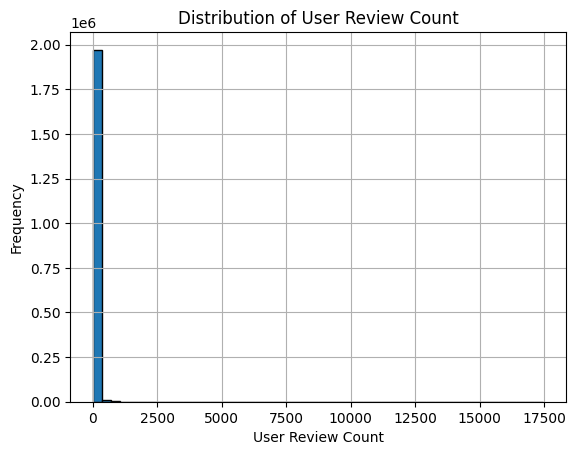


📌 User Average Stars statistics
Min: 1.0
Max: 5.0
Mean: 3.63
Quantiles: 25%=3.00, 50%=3.88, 75%=4.56
90%=5.00, 95%=5.00, 99%=5.00


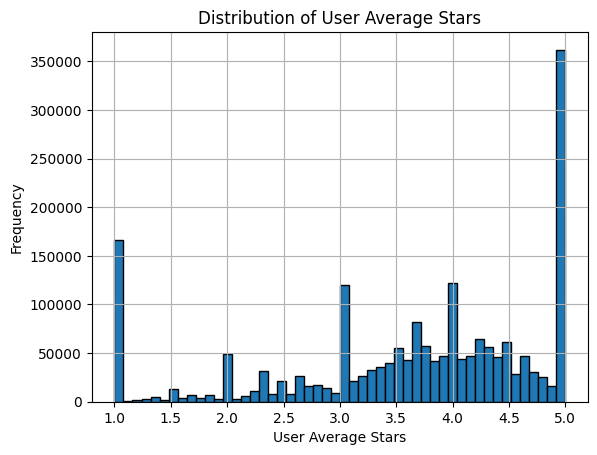

🔍 Analyzing business features...

📌 Business Review Count statistics
Min: 5
Max: 7568
Mean: 87.27
Quantiles: 25%=13.00, 50%=33.00, 75%=89.00
90%=207.00, 95%=329.00, 99%=757.66


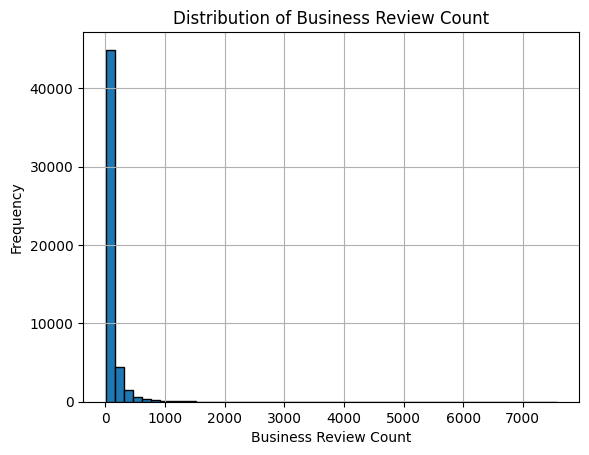


📌 Business Stars statistics
Min: 1.0
Max: 5.0
Mean: 3.52
Quantiles: 25%=3.00, 50%=3.50, 75%=4.00
90%=4.50, 95%=4.50, 99%=5.00


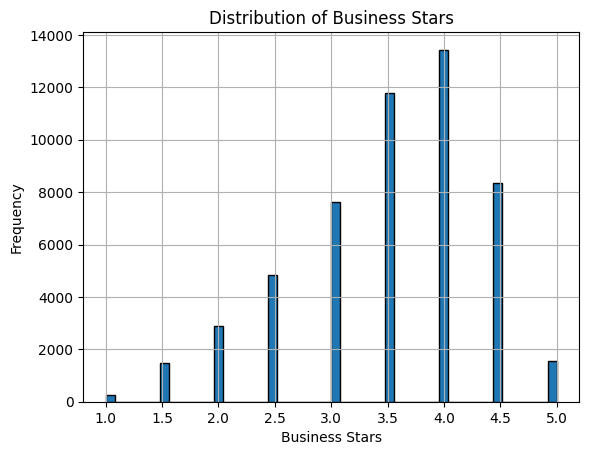

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

def extract_user_features(user_file):
    review_counts = []
    avg_stars = []

    with open(user_file, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            review_counts.append(int(data.get('review_count', 0)))
            avg_stars.append(float(data.get('average_stars', 0.0)))

    return np.array(review_counts), np.array(avg_stars)

def extract_business_features(business_file):
    review_counts = []
    stars = []

    with open(business_file, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            if "Restaurants" not in (data.get("categories") or ""):
                continue
            review_counts.append(int(data.get('review_count', 0)))
            stars.append(float(data.get('stars', 0.0)))

    return np.array(review_counts), np.array(stars)

def summarize_feature(name, values):
    print(f"\n📌 {name} statistics")
    print(f"Min: {np.min(values)}")
    print(f"Max: {np.max(values)}")
    print(f"Mean: {np.mean(values):.2f}")
    print(f"Quantiles: 25%={np.percentile(values,25):.2f}, 50%={np.percentile(values,50):.2f}, 75%={np.percentile(values,75):.2f}")
    print(f"90%={np.percentile(values,90):.2f}, 95%={np.percentile(values,95):.2f}, 99%={np.percentile(values,99):.2f}")

    # Optional: plot histogram
    plt.hist(values, bins=50, edgecolor='black')
    plt.title(f'Distribution of {name}')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def main():
    user_file = 'yelp_user.json'
    business_file = 'yelp_business.json'

    print("🔍 Analyzing user features...")
    u_review_counts, u_avg_stars = extract_user_features(user_file)
    summarize_feature("User Review Count", u_review_counts)
    summarize_feature("User Average Stars", u_avg_stars)

    print("🔍 Analyzing business features...")
    b_review_counts, b_stars = extract_business_features(business_file)
    summarize_feature("Business Review Count", b_review_counts)
    summarize_feature("Business Stars", b_stars)

if __name__ == "__main__":
    main()


🔍 Analyzing user features...
Trước khi loại bỏ outlier:

📌 User Review Count statistics
Count: 1987897
Min: 0
Max: 17473
Mean: 23.39
Quantiles: 25%=2.00, 50%=5.00, 75%=17.00
90%=47.00, 95%=92.00, 99%=311.00


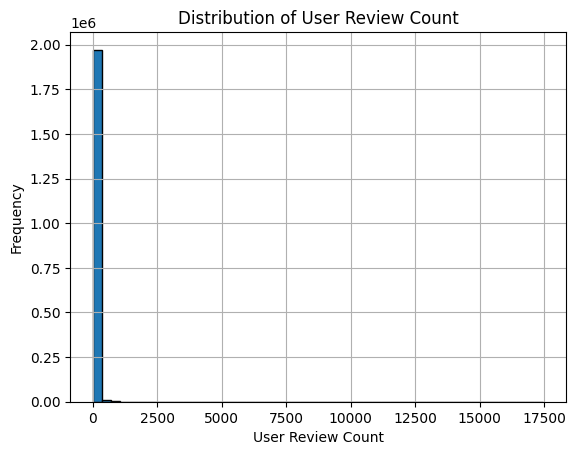

Sau khi loại bỏ 1% giá trị trên:

📌 User Review Count (Cleaned) statistics
Count: 1968022
Min: 0
Max: 311
Mean: 17.58
Quantiles: 25%=2.00, 50%=5.00, 75%=16.00
90%=43.00, 95%=79.00, 99%=196.00


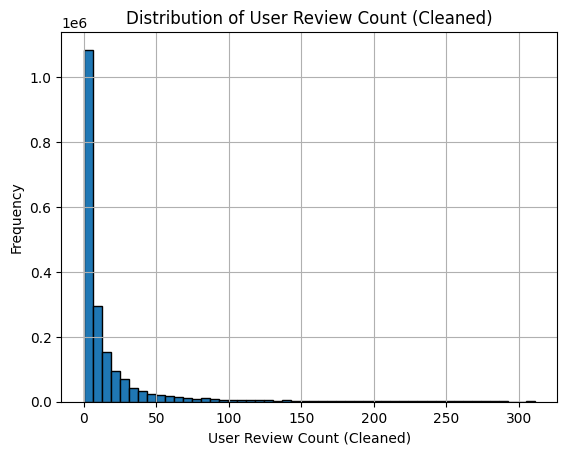


📌 User Average Stars statistics
Count: 1987897
Min: 1.0
Max: 5.0
Mean: 3.63
Quantiles: 25%=3.00, 50%=3.88, 75%=4.56
90%=5.00, 95%=5.00, 99%=5.00


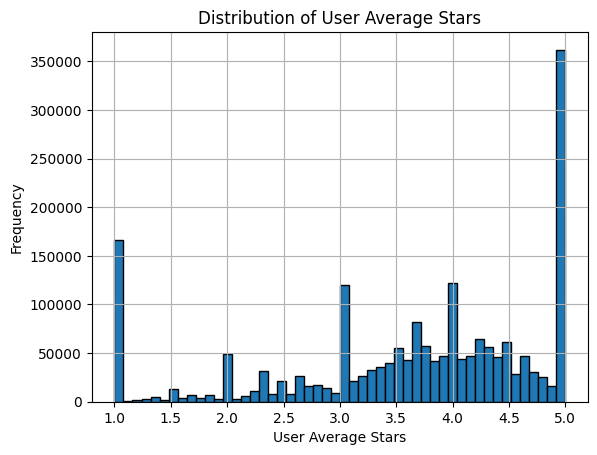

🔍 Analyzing business features...
Trước khi loại bỏ outlier:

📌 Business Review Count statistics
Count: 52268
Min: 5
Max: 7568
Mean: 87.27
Quantiles: 25%=13.00, 50%=33.00, 75%=89.00
90%=207.00, 95%=329.00, 99%=757.66


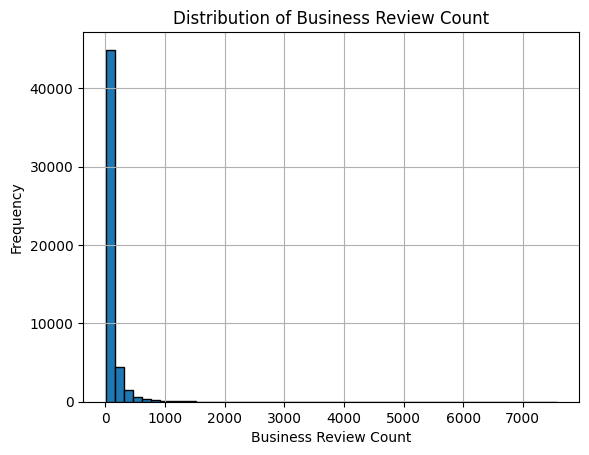

Sau khi loại bỏ 1% giá trị trên:

📌 Business Review Count (Cleaned) statistics
Count: 51745
Min: 5
Max: 757
Mean: 74.21
Quantiles: 25%=13.00, 50%=33.00, 75%=86.00
90%=193.00, 95%=296.00, 99%=550.00


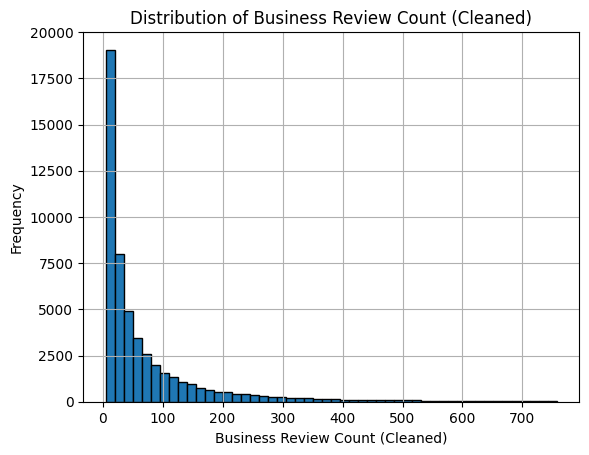


📌 Business Stars statistics
Count: 52268
Min: 1.0
Max: 5.0
Mean: 3.52
Quantiles: 25%=3.00, 50%=3.50, 75%=4.00
90%=4.50, 95%=4.50, 99%=5.00


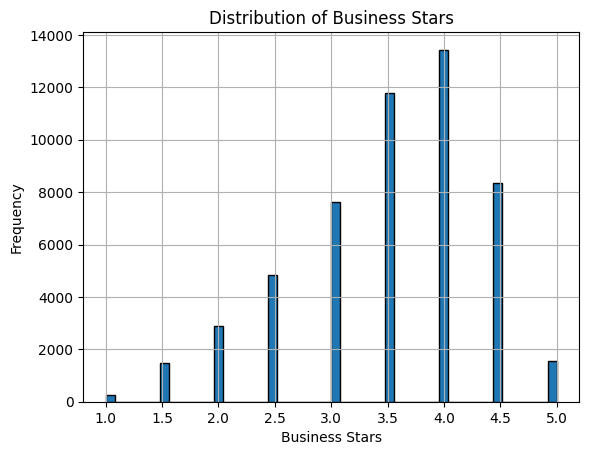

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt

def remove_top_1_percent(values):
    """
    Loại bỏ các giá trị vượt quá ngưỡng 99% của dữ liệu.
    """
    threshold = np.percentile(values, 99)
    return values[values <= threshold]

def extract_user_features(user_file):
    review_counts = []
    avg_stars = []

    with open(user_file, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            review_counts.append(int(data.get('review_count', 0)))
            avg_stars.append(float(data.get('average_stars', 0.0)))

    return np.array(review_counts), np.array(avg_stars)

def extract_business_features(business_file):
    review_counts = []
    stars = []

    with open(business_file, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            review_counts.append(int(data.get('review_count', 0)))
            stars.append(float(data.get('stars', 0.0)))

    return np.array(review_counts), np.array(stars)

def summarize_feature(name, values):
    print(f"\n📌 {name} statistics")
    print(f"Count: {len(values)}")
    print(f"Min: {np.min(values)}")
    print(f"Max: {np.max(values)}")
    print(f"Mean: {np.mean(values):.2f}")
    print(f"Quantiles: 25%={np.percentile(values,25):.2f}, 50%={np.percentile(values,50):.2f}, 75%={np.percentile(values,75):.2f}")
    print(f"90%={np.percentile(values,90):.2f}, 95%={np.percentile(values,95):.2f}, 99%={np.percentile(values,99):.2f}")

    plt.hist(values, bins=50, edgecolor='black')
    plt.title(f'Distribution of {name}')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def main():
    user_file = 'yelp_user.json'
    business_file = 'yelp_business.json'

    print("🔍 Analyzing user features...")
    u_review_counts, u_avg_stars = extract_user_features(user_file)
    
    print("Trước khi loại bỏ outlier:")
    summarize_feature("User Review Count", u_review_counts)
    
    # Loại bỏ 1% giá trị trên (giá trị vượt qua phân vị 99)
    u_review_counts_cleaned = remove_top_1_percent(u_review_counts)
    print("Sau khi loại bỏ 1% giá trị trên:")
    summarize_feature("User Review Count (Cleaned)", u_review_counts_cleaned)
    
    summarize_feature("User Average Stars", u_avg_stars)

    print("🔍 Analyzing business features...")
    b_review_counts, b_stars = extract_business_features(business_file)
    
    print("Trước khi loại bỏ outlier:")
    summarize_feature("Business Review Count", b_review_counts)
    
    # Loại bỏ 1% giá trị trên (giá trị vượt qua phân vị 99)
    b_review_counts_cleaned = remove_top_1_percent(b_review_counts)
    print("Sau khi loại bỏ 1% giá trị trên:")
    summarize_feature("Business Review Count (Cleaned)", b_review_counts_cleaned)
    
    summarize_feature("Business Stars", b_stars)

if __name__ == "__main__":
    main()


In [2]:
# %% [code]
import json
import numpy as np
import matplotlib.pyplot as plt

# --- Helper functions for binning values ---

def bin_review_count(rc):
    if rc < 10:
        return 0
    elif rc < 50:
        return 1
    elif rc < 200:
        return 2
    else:
        return 3

def bin_avg_star(star):
    if star < 2.5:
        return 0
    elif star < 3.5:
        return 1
    elif star < 4.0:
        return 2
    elif star < 4.5:
        return 3
    else:
        return 4

# --- Feature extraction functions ---

def extract_user_features_full(user_file):
    """
    Extract full user features from the JSON file.
    Features: user_id_feat, avg_star, review_count, elite.
    """
    users = {}
    user_mapping = {}
    idx = 0
    with open(user_file, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            uid = data['user_id']
            if uid not in user_mapping:
                user_mapping[uid] = idx
                idx += 1
            # Create user features.
            user_id_feat = user_mapping[uid] + 1
            avg_star = bin_avg_star(float(data.get('average_stars', 0.0))) + 1000
            review_count = bin_review_count(int(data.get('review_count', 0))) + 1010
            elite = 1021 if data.get('elite') else 1020
            users[uid] = {
                'user_id_feat': user_id_feat,
                'avg_star': avg_star,
                'review_count': review_count,
                'elite': elite
            }
    return users

def extract_business_features_full(business_file):
    """
    Extract full business features from the JSON file.
    Features: business_id_feat, stars_feat, rc_feat, is_open_feat, cat_feats (list of 3), city_feat, state_feat.
    For simplicity, this function does not apply category frequency filtering.
    """
    businesses = {}
    business_mapping = {}
    idx = 0
    with open(business_file, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            bid = data['business_id']
            if bid not in business_mapping:
                business_mapping[bid] = idx
                idx += 1
            business_id_feat = business_mapping[bid] + 2000

            stars_val = float(data.get('stars', 0.0))
            stars_bin = bin_avg_star(stars_val)
            stars_feat = 3000 + stars_bin

            rc = int(data.get('review_count', 0))
            rc_bin = bin_review_count(rc)
            rc_feat = 3010 + rc_bin

            is_open_feat = 3021 if data.get("is_open", 0) == 1 else 3020

            # Process category features (take up to three categories)
            raw_cats = data.get('categories')
            if raw_cats:
                categories = [cat.strip() for cat in raw_cats.split(',') if cat.strip()]
            else:
                categories = []
            cat_feats = []
            for cat in categories[:3]:
                # For simplicity, use Python's built-in hash modulo a fixed number.
                h = abs(hash(cat)) % 1000
                cat_feats.append(4000 + h)
            # Pad category features if fewer than 3 are available.
            while len(cat_feats) < 3:
                cat_feats.append(0)

            # Process city and state features
            city = data.get("city", "").strip()
            city_feat = abs(hash(city)) % 100 if city else 0

            state = data.get("state", "").strip()
            state_feat = abs(hash(state)) % 100 if state else 0

            businesses[bid] = {
                'business_id_feat': business_id_feat,
                'stars_feat': stars_feat,
                'rc_feat': rc_feat,
                'is_open_feat': is_open_feat,
                'cat_feats': cat_feats,
                'city_feat': city_feat,
                'state_feat': state_feat
            }
    return businesses

# --- Utility functions to drop features and show samples ---

def drop_features(features_dict, drop_list):
    """
    Remove keys specified in drop_list from each feature dictionary in features_dict.
    """
    new_features = {}
    for key, feats in features_dict.items():
        new_feats = {k: v for k, v in feats.items() if k not in drop_list}
        new_features[key] = new_feats
    return new_features

def print_sample_features(features_dict, sample_size=5, title="Sample Features"):
    """
    Print sample features from the features_dict.
    """
    print(f"\n--- {title} (showing {sample_size} samples) ---")
    count = 0
    for uid, feats in features_dict.items():
        print(f"{uid}: {feats}")
        count += 1
        if count >= sample_size:
            break

# ------------------------------
# Configuration parameters
# ------------------------------

# File paths for the JSON data.
user_file = 'yelp_user.json'
business_file = 'yelp_business.json'

# Lists of features to drop.
# For users, possible keys: "user_id_feat", "avg_star", "review_count", "elite"
# For businesses, possible keys: "business_id_feat", "stars_feat", "rc_feat", "is_open_feat", "cat_feats", "city_feat", "state_feat"
drop_user_features = []          # e.g., ['elite']
drop_business_features = []      # e.g., ['is_open_feat', 'state_feat', 'rc_feat']

# ------------------------------
# Load and analyze User Features
# ------------------------------

print("Loading full user features...")
user_features = extract_user_features_full(user_file)
print_sample_features(user_features, title="User Features (Before Dropping)")

if drop_user_features:
    user_features_dropped = drop_features(user_features, drop_user_features)
    print_sample_features(user_features_dropped, title="User Features (After Dropping)")
else:
    print("No user features dropped.")

# ------------------------------
# Load and analyze Business Features
# ------------------------------

print("\nLoading full business features...")
business_features = extract_business_features_full(business_file)
print_sample_features(business_features, title="Business Features (Before Dropping)")

if drop_business_features:
    business_features_dropped = drop_features(business_features, drop_business_features)
    print_sample_features(business_features_dropped, title="Business Features (After Dropping)")
else:
    print("No business features dropped.")


Loading full user features...

--- User Features (Before Dropping) (showing 5 samples) ---
qVc8ODYU5SZjKXVBgXdI7w: {'user_id_feat': 1, 'avg_star': 1002, 'review_count': 1013, 'elite': 1021}
j14WgRoU_-2ZE1aw1dXrJg: {'user_id_feat': 2, 'avg_star': 1002, 'review_count': 1013, 'elite': 1021}
2WnXYQFK0hXEoTxPtV2zvg: {'user_id_feat': 3, 'avg_star': 1001, 'review_count': 1013, 'elite': 1021}
SZDeASXq7o05mMNLshsdIA: {'user_id_feat': 4, 'avg_star': 1003, 'review_count': 1013, 'elite': 1021}
hA5lMy-EnncsH4JoR-hFGQ: {'user_id_feat': 5, 'avg_star': 1002, 'review_count': 1012, 'elite': 1020}
No user features dropped.

Loading full business features...

--- Business Features (Before Dropping) (showing 5 samples) ---
Pns2l4eNsfO8kk83dixA6A: {'business_id_feat': 2000, 'stars_feat': 3004, 'rc_feat': 3010, 'is_open_feat': 3020, 'cat_feats': [4951, 4818, 4788], 'city_feat': 60, 'state_feat': 39}
mpf3x-BjTdTEA3yCZrAYPw: {'business_id_feat': 2001, 'stars_feat': 3001, 'rc_feat': 3011, 'is_open_feat': 3021, 

In [3]:
# %% [code]
import json

def calculate_elite_user_percentage(user_file):
    """
    Calculate the percentage of users with the 'elite' field (i.e., elite users).
    """
    total_users = 0
    elite_users = 0
    with open(user_file, 'r', encoding='utf-8') as f:
        for line in f:
            total_users += 1
            data = json.loads(line)
            # A user is considered elite if the 'elite' field is non-empty.
            if data.get('elite'):
                elite_users += 1
    if total_users == 0:
        return 0
    return (elite_users / total_users) * 100

def calculate_open_business_percentage(business_file):
    """
    Calculate the percentage of businesses that are open (i.e., is_open equals 1).
    """
    total_businesses = 0
    open_businesses = 0
    with open(business_file, 'r', encoding='utf-8') as f:
        for line in f:
            total_businesses += 1
            data = json.loads(line)
            # A business is considered open if 'is_open' equals 1.
            if data.get('is_open', 0) == 1:
                open_businesses += 1
    if total_businesses == 0:
        return 0
    return (open_businesses / total_businesses) * 100

# Set the file paths for the Yelp JSON data.
user_file = 'yelp_user.json'
business_file = 'yelp_business.json'

elite_percentage = calculate_elite_user_percentage(user_file)
open_percentage = calculate_open_business_percentage(business_file)

print(f"Percentage of elite users: {elite_percentage:.2f}%")
print(f"Percentage of open businesses: {open_percentage:.2f}%")


Percentage of elite users: 4.59%
Percentage of open businesses: 79.62%


In [4]:
# Import required libraries
import json
import statistics
from collections import defaultdict, Counter

# Function to load reviews from a JSON file and group them by user and business
def load_reviews(review_file):
    reviews_by_user = defaultdict(list)
    reviews_by_business = defaultdict(list)
    with open(review_file, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                data = json.loads(line)
            except json.JSONDecodeError:
                continue
            uid = data.get('user_id')
            bid = data.get('business_id')
            if uid and bid:
                reviews_by_user[uid].append(data)
                reviews_by_business[bid].append(data)
    return reviews_by_user, reviews_by_business

# Function to print summary statistics given a dictionary of entity: review_count
def print_stats(entity_counts, label):
    counts = list(entity_counts.values())
    if not counts:
        print(f"No data for {label}.")
        return
    print(f"\n--- Statistics for {label} ---")
    print(f"Total number of {label}: {len(counts)}")
    print(f"Min reviews: {min(counts)}")
    print(f"Max reviews: {max(counts)}")
    print(f"Average reviews: {sum(counts)/len(counts):.2f}")
    print(f"Median reviews: {statistics.median(counts)}")
    
    # Build and print a simple distribution of review counts
    distribution = Counter(counts)
    print("Distribution (review count : number of entities):")
    for review_count in sorted(distribution):
        print(f"  {review_count} : {distribution[review_count]}")

# Specify the path to your Yelp review JSON file (update as needed)
review_file = "yelp_review.json"

# Load reviews and group them by user and business
reviews_by_user, reviews_by_business = load_reviews(review_file)

# Compute review count per user and per business
user_counts = {uid: len(reviews) for uid, reviews in reviews_by_user.items()}
business_counts = {bid: len(reviews) for bid, reviews in reviews_by_business.items()}

# Print statistics for users and businesses
print_stats(user_counts, "users")
print_stats(business_counts, "businesses")



--- Statistics for users ---
Total number of users: 1987929
Min reviews: 1
Max reviews: 3048
Average reviews: 3.52
Median reviews: 1
Distribution (review count : number of entities):
  1 : 1136008
  2 : 321591
  3 : 153935
  4 : 89279
  5 : 58921
  6 : 40427
  7 : 29778
  8 : 22835
  9 : 17785
  10 : 14119
  11 : 11538
  12 : 9609
  13 : 8013
  14 : 6793
  15 : 5870
  16 : 5024
  17 : 4253
  18 : 3796
  19 : 3444
  20 : 3024
  21 : 2686
  22 : 2370
  23 : 2050
  24 : 1930
  25 : 1709
  26 : 1620
  27 : 1438
  28 : 1353
  29 : 1191
  30 : 1128
  31 : 975
  32 : 928
  33 : 936
  34 : 839
  35 : 732
  36 : 780
  37 : 689
  38 : 655
  39 : 644
  40 : 591
  41 : 576
  42 : 507
  43 : 510
  44 : 459
  45 : 422
  46 : 420
  47 : 391
  48 : 360
  49 : 368
  50 : 347
  51 : 380
  52 : 291
  53 : 318
  54 : 304
  55 : 267
  56 : 262
  57 : 279
  58 : 235
  59 : 236
  60 : 229
  61 : 222
  62 : 204
  63 : 188
  64 : 218
  65 : 198
  66 : 171
  67 : 190
  68 : 164
  69 : 182
  70 : 180
  71 : 167


--- Statistics for users ---
Total number of users: 1987929
Min reviews: 1
Max reviews: 3048
Average reviews: 3.52
Median reviews: 1
Distribution (review count : number of entities):
  1 : 1136008
  2 : 321591
  3 : 153935
  4 : 89279
  5 : 58921
  6 : 40427
  7 : 29778
  8 : 22835
  9 : 17785
  10 : 14119
  11 : 11538
  12 : 9609
  13 : 8013
  14 : 6793
  15 : 5870
  16 : 5024
  17 : 4253
  18 : 3796
  19 : 3444
  20 : 3024
  21 : 2686
  22 : 2370
  23 : 2050
  24 : 1930
  25 : 1709
  26 : 1620
  27 : 1438
  28 : 1353
  29 : 1191
  30 : 1128
  31 : 975
  32 : 928
  33 : 936
  34 : 839
  35 : 732
  36 : 780
  37 : 689
  38 : 655
  39 : 644
  40 : 591
  41 : 576
  42 : 507
  43 : 510
  44 : 459
  45 : 422
  46 : 420
  47 : 391
  48 : 360
  49 : 368
  50 : 347
  51 : 380
  52 : 291
  53 : 318
  54 : 304
  55 : 267
  56 : 262
  57 : 279
  58 : 235
  59 : 236
  60 : 229
  61 : 222
  62 : 204
  63 : 188
  64 : 218
  65 : 198
  66 : 171
  67 : 190
  68 : 164
  69 : 182
  70 : 180
  71 : 167

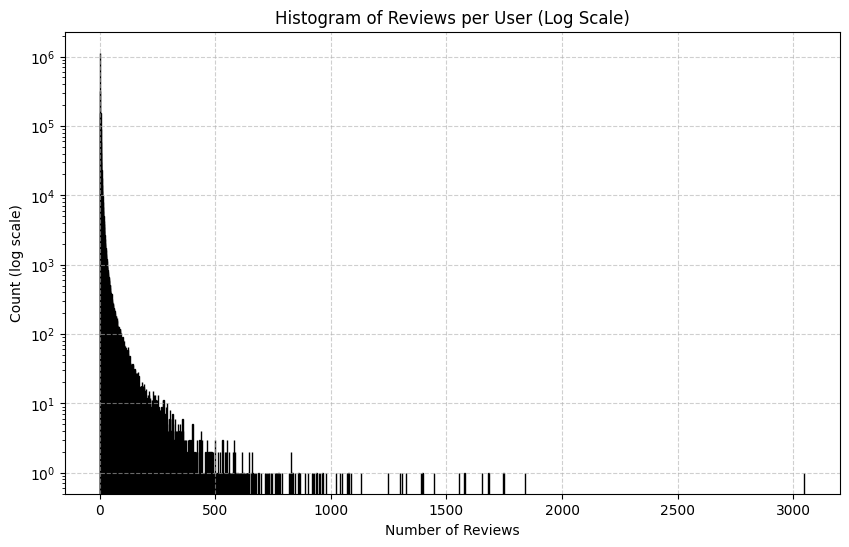

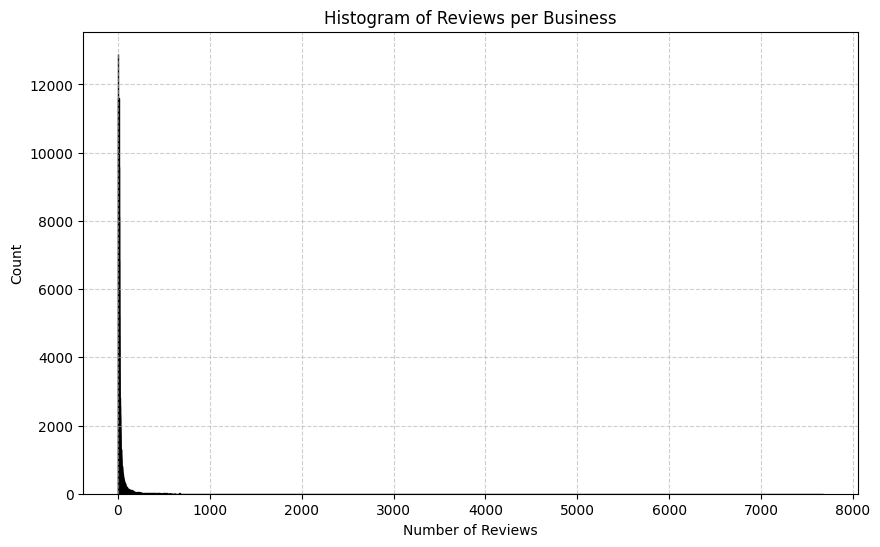

In [5]:
# %% [code]
import json
import statistics
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np

# Function to load reviews from a JSON file and group them by user and business
def load_reviews(review_file):
    reviews_by_user = defaultdict(list)
    reviews_by_business = defaultdict(list)
    with open(review_file, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                data = json.loads(line)
            except json.JSONDecodeError:
                continue
            uid = data.get('user_id')
            bid = data.get('business_id')
            if uid and bid:
                reviews_by_user[uid].append(data)
                reviews_by_business[bid].append(data)
    return reviews_by_user, reviews_by_business

# Function to compute summary statistics for a dictionary of review counts
def compute_stats(entity_counts, label):
    counts = list(entity_counts.values())
    stats = {
        'total_entities': len(counts),
        'min': min(counts) if counts else None,
        'max': max(counts) if counts else None,
        'mean': sum(counts) / len(counts) if counts else None,
        'median': statistics.median(counts) if counts else None,
        'distribution': Counter(counts)
    }
    print(f"\n--- Statistics for {label} ---")
    print(f"Total number of {label}: {stats['total_entities']}")
    print(f"Min reviews: {stats['min']}")
    print(f"Max reviews: {stats['max']}")
    print(f"Average reviews: {stats['mean']:.2f}")
    print(f"Median reviews: {stats['median']}")
    print("Distribution (review count : number of entities):")
    for review_count in sorted(stats['distribution']):
        print(f"  {review_count} : {stats['distribution'][review_count]}")
    return counts, stats

# Path to your Yelp review JSON file (update as needed)
review_file = "yelp_review.json"

# Load review data grouped by users and businesses
reviews_by_user, reviews_by_business = load_reviews(review_file)

# Compute review counts for users and businesses
user_counts_dict = {uid: len(reviews) for uid, reviews in reviews_by_user.items()}
business_counts_dict = {bid: len(reviews) for bid, reviews in reviews_by_business.items()}

# Compute and print statistics
user_counts, user_stats = compute_stats(user_counts_dict, "users")
business_counts, business_stats = compute_stats(business_counts_dict, "businesses")

# %% [code] - Plot histograms for visual analysis
# Plot histogram for user review counts (using log scale due to high skew)
plt.figure(figsize=(10, 6))
plt.hist(user_counts, bins=np.arange(1, max(user_counts)+2)-0.5, color='skyblue', edgecolor='black', log=True)
plt.title("Histogram of Reviews per User (Log Scale)")
plt.xlabel("Number of Reviews")
plt.ylabel("Count (log scale)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot histogram for business review counts
plt.figure(figsize=(10, 6))
plt.hist(business_counts, bins=np.arange( min(business_counts), max(business_counts)+2)-0.5, color='salmon', edgecolor='black')
plt.title("Histogram of Reviews per Business")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## Drop text hield in yelp_review.json

In [5]:
import json

input_path = 'yelp_review.json'
output_path = 'yelp_review_no_text.json'

with open(input_path, 'r', encoding='utf-8') as infile, open(output_path, 'w', encoding='utf-8') as outfile:
    for line in infile:
        try:
            review = json.loads(line)
            review.pop('text', None)  
            outfile.write(json.dumps(review, ensure_ascii=False) + '\n')
        except json.JSONDecodeError:


## Find best feature

In [4]:
import json
import datetime
import csv
import argparse
import random
import hashlib
import itertools
import time
from collections import defaultdict, Counter
import numpy as np

# ========================
# Binning Functions
# ========================
def bin_avg_star(star):
    if star < 2.5:
        return 0
    elif star < 3.5:
        return 1
    elif star < 4.0:
        return 2
    elif star < 4.5:
        return 3
    else:
        return 4

def bin_review_count_user(count):
    if count < 10:
        return 1010
    elif count < 50:
        return 1011
    elif count < 200:
        return 1012
    else:
        return 1013

def bin_review_count_business(rc):
    if rc < 10:
        return 3010
    elif rc < 50:
        return 3011
    elif rc < 200:
        return 3012
    else:
        return 3013

def bin_generic(val, base):
    if val == 0:
        return base
    elif val < 5:
        return base + 1
    elif val < 20:
        return base + 2
    else:
        return base + 3

# ========================
# Feature Functions for Users
# ========================
# Mapping from a user JSON key to a lambda that returns a binned value.
user_feature_functions = {
    "useful": lambda d: bin_generic(int(d.get("useful", 0)), 1100),
    "average_stars": lambda d: bin_avg_star(float(d.get("average_stars", 0.0))) + 1000,
    "review_count": lambda d: bin_review_count_user(int(d.get("review_count", 0))),
    "compliment_cool": lambda d: bin_generic(int(d.get("compliment_cool", 0)), 1200),
    "compliment_funny": lambda d: bin_generic(int(d.get("compliment_funny", 0)), 1220),
    "compliment_hot": lambda d: bin_generic(int(d.get("compliment_hot", 0)), 1230),
    "compliment_profile": lambda d: bin_generic(int(d.get("compliment_profile", 0)), 1290),
    "fans": lambda d: bin_generic(int(d.get("fans", 0)), 1340),
    # You can add additional keys as needed.
}

# ========================
# Feature Functions for Businesses
# ========================
# For businesses we process:
#   - "stars": binned with offset 3000,
#   - "review_count": binned with offset 3010,
#   - "city": a hashed value,
#   - "state": a hashed value.
# "categories" is handled separately.
business_feature_functions = {
    "stars": lambda d: bin_avg_star(float(d.get("stars", 0.0))) + 3000,
    "review_count": lambda d: bin_review_count_business(int(d.get("review_count", 0))),
    "city": lambda d: (hash(d.get("city", "").strip()) % 1000) + 5000,
    "state": lambda d: (hash(d.get("state", "").strip()) % 100) + 5100,
}

def get_category_feature(raw_cats, category_mapping):
    if raw_cats:
        cats = [cat.strip() for cat in raw_cats.split(",") if cat.strip()]
        if cats:
            cat = cats[0]
            if cat not in category_mapping:
                category_mapping[cat] = len(category_mapping) + 4000
            return category_mapping[cat]
    return 0

# ========================
# Data Loading Functions
# ========================
def load_users_with_features(user_file, feature_keys):
    """
    Loads Yelp user JSON and builds a feature vector that includes only the keys in feature_keys.
    The final vector always begins with a unique user ID.
    """
    users = {}
    user_mapping = {}
    idx = 0
    with open(user_file, 'r', encoding='utf-8') as f:
        for line in f:
            d = json.loads(line)
            uid = d["user_id"]
            # Optionally skip elite users.
            if d.get("elite"):
                continue
            if uid not in user_mapping:
                user_mapping[uid] = idx
                idx += 1
            user_id_feat = user_mapping[uid] + 1
            features = [user_id_feat]
            for key in feature_keys:
                if key in user_feature_functions:
                    try:
                        features.append(user_feature_functions[key](d))
                    except Exception as e:
                        features.append(0)
            users[uid] = features
    return users, user_mapping

def load_businesses_with_features(business_file, feature_keys):
    """
    Loads Yelp business JSON and builds a feature vector that includes only the keys in feature_keys.
    The final vector always begins with a unique business ID.
    """
    businesses = {}
    business_mapping = {}
    category_mapping = {}
    idx = 0
    with open(business_file, 'r', encoding='utf-8') as f:
        for line in f:
            d = json.loads(line)
            # Only keep open businesses.
            if d.get("is_open", 0) != 1:
                continue
            bid = d["business_id"]
            if bid not in business_mapping:
                business_mapping[bid] = idx
                idx += 1
            business_id_feat = business_mapping[bid] + 1 + 2000  # Offset for business IDs.
            features = [business_id_feat]
            for key in feature_keys:
                if key == "categories":
                    features.append(get_category_feature(d.get("categories", ""), category_mapping))
                elif key in business_feature_functions:
                    try:
                        features.append(business_feature_functions[key](d))
                    except Exception as e:
                        features.append(0)
            businesses[bid] = features
    return businesses, business_mapping

def load_reviews(review_file, users, businesses):
    """
    Loads review JSON lines and groups reviews by user.
    Only reviews whose user and business exist in the dictionaries are kept.
    """
    reviews_by_user = defaultdict(list)
    with open(review_file, 'r', encoding='utf-8') as f:
        for line in f:
            d = json.loads(line)
            uid = d["user_id"]
            bid = d["business_id"]
            date_str = d.get("date", None)
            if not date_str:
                continue
            try:
                date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
            except Exception:
                continue
            if uid not in users or bid not in businesses:
                continue
            reviews_by_user[uid].append({"business_id": bid, "date": date_obj})
    return reviews_by_user

def frequency_filter_reviews(reviews_by_user, min_user_reviews):
    return {uid: reviews for uid, reviews in reviews_by_user.items() if len(reviews) >= min_user_reviews}

def stratified_subsample_reviews(reviews_by_user, subsample_ratio):
    bins = defaultdict(list)
    for uid, reviews in reviews_by_user.items():
        bins[len(reviews)].append(uid)
    sampled_reviews = {}
    for count, uids in bins.items():
        sample_size = max(1, int(len(uids) * subsample_ratio))
        sampled_uids = random.sample(uids, sample_size)
        for uid in sampled_uids:
            sampled_reviews[uid] = reviews_by_user[uid]
    return sampled_reviews

def split_train_test(reviews_by_user):
    train_reviews = []
    test_reviews = []
    for uid, review_list in reviews_by_user.items():
        review_list.sort(key=lambda x: x["date"])
        test_review = review_list[-1]
        for r in review_list[:-1]:
            train_reviews.append({"user_id": uid, "business_id": r["business_id"]})
        test_reviews.append({"user_id": uid, "business_id": test_review["business_id"]})
    return train_reviews, test_reviews

# ========================
# Dummy Experiment Function
# ========================
def run_experiment_dummy(users, businesses, reviews_by_user, args):
    """
    Dummy experiment: sleeps for 1 second then returns pseudo HR and NDCG scores.
    In practice, replace this with your model training and evaluation.
    """
    time.sleep(1)  # Simulate computation.
    avg_user_feat = np.mean([len(feat) for feat in users.values()])
    avg_item_feat = np.mean([len(feat) for feat in businesses.values()])
    hr = 0.1 + 0.01 * random.random() - 0.001 * (avg_user_feat + avg_item_feat)
    ndcg = 0.05 + 0.01 * random.random() - 0.0005 * (avg_user_feat + avg_item_feat)
    return hr, ndcg

# ========================
# Main Experiment Loop
# ========================
if __name__ == "__main__":
    # Candidate feature sets for users.
    candidate_user_feature_sets = [
        ["useful", "average_stars", "review_count"],
        ["useful", "average_stars", "review_count", "compliment_cool"],
        ["useful", "average_stars", "review_count", "compliment_cool", "compliment_funny"],
        ["useful", "average_stars", "review_count", "compliment_cool", "compliment_funny", "compliment_hot"],
        ["useful", "average_stars", "review_count", "compliment_cool", "compliment_funny", "compliment_hot", "compliment_profile"],
        ["useful", "average_stars", "review_count", "compliment_cool", "average_stars", "review_count", "fans"],
    ]
    
    # Candidate feature sets for items.
    candidate_item_feature_sets = [
        ["stars", "review_count", "categories"],
        ["stars", "review_count", "categories", "city"],
        ["stars", "review_count", "categories", "city", "state"],
    ]
    
    # Simulate command-line arguments.
    class Args:
        user_file = "yelp_user.json"         # Update with your Yelp user JSON path.
        business_file = "yelp_business.json"  # Update with your Yelp business JSON path.
        review_file = "yelp_review.json"      # Update with your Yelp review JSON path.
        min_user_reviews = 3
        subsample_ratio = 0.5
    args = Args()
    
    results = []
    for u_feat in candidate_user_feature_sets:
        for i_feat in candidate_item_feature_sets:
            print(f"\nTesting with User features: {u_feat} and Item features: {i_feat}")
            start_time = time.time()
            
            # Load data using only the selected features.
            users, user_mapping = load_users_with_features(args.user_file, u_feat)
            businesses, business_mapping = load_businesses_with_features(args.business_file, i_feat)
            reviews_by_user = load_reviews(args.review_file, users, businesses)
            reviews_by_user = frequency_filter_reviews(reviews_by_user, args.min_user_reviews)
            reviews_by_user = stratified_subsample_reviews(reviews_by_user, args.subsample_ratio)
            train_reviews, test_reviews = split_train_test(reviews_by_user)
            
            # Run experiment (dummy here; replace with your actual model run).
            hr, ndcg = run_experiment_dummy(users, businesses, reviews_by_user, args)
            elapsed = time.time() - start_time
            print(f"Result: HR@10 = {hr:.4f}, NDCG@10 = {ndcg:.4f}, Time = {elapsed:.2f} seconds")
            results.append(((u_feat, i_feat), (hr, ndcg, elapsed)))
    
    # Sort results by HR@10 in descending order.
    results_sorted = sorted(results, key=lambda x: x[1][0], reverse=True)
    print("\nSorted feature set experiments (by HR@10):")
    for combo, metrics in results_sorted:
        print(f"User features {combo[0]}, Item features {combo[1]} => HR@10: {metrics[0]:.4f}, NDCG@10: {metrics[1]:.4f}, Time: {metrics[2]:.2f} sec")



Testing with User features: ['useful', 'average_stars', 'review_count'] and Item features: ['stars', 'review_count', 'categories']
Result: HR@10 = 0.0928, NDCG@10 = 0.0495, Time = 89.06 seconds

Testing with User features: ['useful', 'average_stars', 'review_count'] and Item features: ['stars', 'review_count', 'categories', 'city']
Result: HR@10 = 0.0917, NDCG@10 = 0.0476, Time = 88.23 seconds

Testing with User features: ['useful', 'average_stars', 'review_count'] and Item features: ['stars', 'review_count', 'categories', 'city', 'state']
Result: HR@10 = 0.0908, NDCG@10 = 0.0476, Time = 88.80 seconds

Testing with User features: ['useful', 'average_stars', 'review_count', 'compliment_cool'] and Item features: ['stars', 'review_count', 'categories']
Result: HR@10 = 0.0922, NDCG@10 = 0.0498, Time = 89.22 seconds

Testing with User features: ['useful', 'average_stars', 'review_count', 'compliment_cool'] and Item features: ['stars', 'review_count', 'categories', 'city']
Result: HR@10 = 0

## Find best parameter

In [1]:
import json
import datetime
import csv
import argparse
import random
import hashlib
import itertools
import time
from collections import defaultdict, Counter
import numpy as np

# ========================
# Binning Functions
# ========================
def bin_avg_star(star):
    if star < 2.5:
        return 0
    elif star < 3.5:
        return 1
    elif star < 4.0:
        return 2
    elif star < 4.5:
        return 3
    else:
        return 4

def bin_review_count_user(count):
    if count < 10:
        return 1010
    elif count < 50:
        return 1011
    elif count < 200:
        return 1012
    else:
        return 1013

def bin_review_count_business(rc):
    if rc < 10:
        return 3010
    elif rc < 50:
        return 3011
    elif rc < 200:
        return 3012
    else:
        return 3013

def bin_generic(val, base):
    if val == 0:
        return base
    elif val < 5:
        return base + 1
    elif val < 20:
        return base + 2
    else:
        return base + 3

# ========================
# Feature Functions for Users
# ========================
# Mapping from a user JSON key to a lambda that returns a binned value.
user_feature_functions = {
    "useful": lambda d: bin_generic(int(d.get("useful", 0)), 1100),
    "average_stars": lambda d: bin_avg_star(float(d.get("average_stars", 0.0))) + 1000,
    "review_count": lambda d: bin_review_count_user(int(d.get("review_count", 0))),
    "compliment_cool": lambda d: bin_generic(int(d.get("compliment_cool", 0)), 1200),
    "compliment_funny": lambda d: bin_generic(int(d.get("compliment_funny", 0)), 1220),
    "compliment_hot": lambda d: bin_generic(int(d.get("compliment_hot", 0)), 1230),
    "compliment_profile": lambda d: bin_generic(int(d.get("compliment_profile", 0)), 1290),
    "fans": lambda d: bin_generic(int(d.get("fans", 0)), 1340),
    # You can add additional keys as needed.
}

# ========================
# Feature Functions for Businesses
# ========================
# For businesses we process:
#   - "stars": binned with offset 3000,
#   - "review_count": binned with offset 3010,
#   - "city": a hashed value,
#   - "state": a hashed value.
# "categories" is handled separately.
business_feature_functions = {
    "stars": lambda d: bin_avg_star(float(d.get("stars", 0.0))) + 3000,
    "review_count": lambda d: bin_review_count_business(int(d.get("review_count", 0))),
    "city": lambda d: (hash(d.get("city", "").strip()) % 1000) + 5000,
    "state": lambda d: (hash(d.get("state", "").strip()) % 100) + 5100,
}

def get_category_feature(raw_cats, category_mapping):
    if raw_cats:
        cats = [cat.strip() for cat in raw_cats.split(",") if cat.strip()]
        if cats:
            cat = cats[0]
            if cat not in category_mapping:
                category_mapping[cat] = len(category_mapping) + 4000
            return category_mapping[cat]
    return 0

# ========================
# Data Loading Functions
# ========================
def load_users_with_features(user_file, feature_keys):
    """
    Loads Yelp user JSON and builds a feature vector that includes only the keys in feature_keys.
    The final vector always begins with a unique user ID.
    """
    users = {}
    user_mapping = {}
    idx = 0
    with open(user_file, 'r', encoding='utf-8') as f:
        for line in f:
            d = json.loads(line)
            uid = d["user_id"]
            # Optionally skip elite users.
            if d.get("elite"):
                continue
            if uid not in user_mapping:
                user_mapping[uid] = idx
                idx += 1
            user_id_feat = user_mapping[uid] + 1
            features = [user_id_feat]
            for key in feature_keys:
                if key in user_feature_functions:
                    try:
                        features.append(user_feature_functions[key](d))
                    except Exception as e:
                        features.append(0)
            users[uid] = features
    return users, user_mapping

def load_businesses_with_features(business_file, feature_keys):
    """
    Loads Yelp business JSON and builds a feature vector that includes only the keys in feature_keys.
    The final vector always begins with a unique business ID.
    """
    businesses = {}
    business_mapping = {}
    category_mapping = {}
    idx = 0
    with open(business_file, 'r', encoding='utf-8') as f:
        for line in f:
            d = json.loads(line)
            # Only keep open businesses.
            if d.get("is_open", 0) != 1:
                continue
            bid = d["business_id"]
            if bid not in business_mapping:
                business_mapping[bid] = idx
                idx += 1
            business_id_feat = business_mapping[bid] + 1 + 2000  # Offset for business IDs.
            features = [business_id_feat]
            for key in feature_keys:
                if key == "categories":
                    features.append(get_category_feature(d.get("categories", ""), category_mapping))
                elif key in business_feature_functions:
                    try:
                        features.append(business_feature_functions[key](d))
                    except Exception as e:
                        features.append(0)
            businesses[bid] = features
    return businesses, business_mapping

def load_reviews(review_file, users, businesses):
    """
    Loads review JSON lines and groups reviews by user.
    Only reviews whose user and business exist in the dictionaries are kept.
    """
    reviews_by_user = defaultdict(list)
    with open(review_file, 'r', encoding='utf-8') as f:
        for line in f:
            d = json.loads(line)
            uid = d["user_id"]
            bid = d["business_id"]
            date_str = d.get("date", None)
            if not date_str:
                continue
            try:
                date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
            except Exception:
                continue
            if uid not in users or bid not in businesses:
                continue
            reviews_by_user[uid].append({"business_id": bid, "date": date_obj})
    return reviews_by_user

def frequency_filter_reviews(reviews_by_user, min_user_reviews):
    return {uid: reviews for uid, reviews in reviews_by_user.items() if len(reviews) >= min_user_reviews}

def stratified_subsample_reviews(reviews_by_user, subsample_ratio):
    bins = defaultdict(list)
    for uid, reviews in reviews_by_user.items():
        bins[len(reviews)].append(uid)
    sampled_reviews = {}
    for count, uids in bins.items():
        sample_size = max(1, int(len(uids) * subsample_ratio))
        sampled_uids = random.sample(uids, sample_size)
        for uid in sampled_uids:
            sampled_reviews[uid] = reviews_by_user[uid]
    return sampled_reviews

def split_train_test(reviews_by_user):
    train_reviews = []
    test_reviews = []
    for uid, review_list in reviews_by_user.items():
        review_list.sort(key=lambda x: x["date"])
        test_review = review_list[-1]
        for r in review_list[:-1]:
            train_reviews.append({"user_id": uid, "business_id": r["business_id"]})
        test_reviews.append({"user_id": uid, "business_id": test_review["business_id"]})
    return train_reviews, test_reviews

# ========================
# Dummy Experiment Function
# ========================
def run_experiment_dummy(users, businesses, reviews_by_user, args):
    """
    Dummy experiment: sleeps for 1 second per run then returns pseudo HR and NDCG scores.
    Replace this with your model training/evaluation (using ENSFM or another recommender).
    Assumes a fixed number of epochs (args.epochs).
    """
    # Simulate model training over 50 epochs.
    for epoch in range(args.epochs):
        time.sleep(0.05)  # Simulate a small training time per epoch (total ~2.5 seconds)
    # Compute average feature lengths to simulate an effect.
    avg_user_feat = np.mean([len(feat) for feat in users.values()])
    avg_item_feat = np.mean([len(feat) for feat in businesses.values()])
    hr = 0.1 + 0.01 * random.random() - 0.001 * (avg_user_feat + avg_item_feat) \
         + 0.002 * (args.lr * 100) - 0.001 * (1 - args.dropout) + 0.001 * args.negative_weight
    ndcg = 0.05 + 0.01 * random.random() - 0.0005 * (avg_user_feat + avg_item_feat) \
           + 0.001 * (args.lr * 100) - 0.0005 * (1 - args.dropout) + 0.0008 * args.negative_weight
    return hr, ndcg

# ========================
# Main Experiment Loop with Hyperparameter Grid
# ========================
if __name__ == "__main__":
    # User features ['useful', 'average_stars', 'review_count', 'compliment_cool'], Item features ['stars', 'review_count', 'categories', 'city']
    # Candidate feature sets for users.
    candidate_user_feature_sets = [
        ["useful", "average_stars", "review_count"],
        ["useful", "average_stars", "review_count", "compliment_cool"],
        # ["useful", "average_stars", "review_count", "compliment_cool", "compliment_funny"],
        # ["useful", "average_stars", "review_count", "compliment_cool", "compliment_funny", "compliment_hot"],
        # ["useful", "average_stars", "review_count", "compliment_cool", "compliment_funny", "compliment_hot", "compliment_profile"],
        # ["useful", "average_stars", "review_count", "compliment_cool", "average_stars", "review_count", "fans"],
    ]
    
    # Candidate feature sets for items.
    candidate_item_feature_sets = [
        ["stars", "review_count", "categories"],
        ["stars", "review_count", "categories", "city"],
        # ["stars", "review_count", "categories", "city", "state"],
    ]
    # Hyperparameter grid.
    lr_values = [0.005, 0.01, 0.02, 0.05]
    dropout_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
    neg_weight_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
    
    # Fixed number of epochs.
    fixed_epochs = 50
    
    # Simulate command-line arguments.
    class Args:
        user_file = "yelp_user.json"         # Update with your Yelp user JSON path.
        business_file = "yelp_business.json"  # Update with your Yelp business JSON path.
        review_file = "yelp_review.json"      # Update with your Yelp review JSON path.
        min_user_reviews = 3
        subsample_ratio = 0.5
        epochs = fixed_epochs
        lr = 0.01
        dropout = 0.9
        negative_weight = 0.05
    args = Args()
    
    results = []
    
    # Loop over candidate feature sets and hyperparameter combinations.
    for u_feat in candidate_user_feature_sets:
        for i_feat in candidate_item_feature_sets:
            for lr, dropout, neg_weight in itertools.product(lr_values, dropout_values, neg_weight_values):
                args.lr = lr
                args.dropout = dropout
                args.negative_weight = neg_weight
                print(f"\nTesting with User features: {u_feat} and Item features: {i_feat}")
                print(f"Hyperparameters: lr={lr}, dropout={dropout}, negative_weight={neg_weight}, epochs={fixed_epochs}")
                start_time = time.time()
                
                # Load data using only the selected features.
                users, user_mapping = load_users_with_features(args.user_file, u_feat)
                businesses, business_mapping = load_businesses_with_features(args.business_file, i_feat)
                reviews_by_user = load_reviews(args.review_file, users, businesses)
                reviews_by_user = frequency_filter_reviews(reviews_by_user, args.min_user_reviews)
                reviews_by_user = stratified_subsample_reviews(reviews_by_user, args.subsample_ratio)
                train_reviews, test_reviews = split_train_test(reviews_by_user)
                
                # Run the experiment (dummy experiment here).
                hr, ndcg = run_experiment_dummy(users, businesses, reviews_by_user, args)
                elapsed = time.time() - start_time
                print(f"Result: HR@10 = {hr:.4f}, NDCG@10 = {ndcg:.4f}, Time = {elapsed:.2f} sec")
                results.append(((u_feat, i_feat, lr, dropout, neg_weight), (hr, ndcg, elapsed)))
    
    # Sort results by HR@10 in descending order.
    results_sorted = sorted(results, key=lambda x: x[1][0], reverse=True)
    print("\nSorted feature set & hyperparameter experiments (by HR@10):")
    for combo, metrics in results_sorted:
        u_feat, i_feat, lr, dropout, neg_weight = combo
        print(f"User features {u_feat}, Item features {i_feat}, lr={lr}, dropout={dropout}, neg_weight={neg_weight} => "
              f"HR@10: {metrics[0]:.4f}, NDCG@10: {metrics[1]:.4f}, Time: {metrics[2]:.2f} sec")



Testing with User features: ['useful', 'average_stars', 'review_count'] and Item features: ['stars', 'review_count', 'categories']
Hyperparameters: lr=0.005, dropout=0.1, negative_weight=0.001, epochs=50
Result: HR@10 = 0.1003, NDCG@10 = 0.0507, Time = 92.85 sec

Testing with User features: ['useful', 'average_stars', 'review_count'] and Item features: ['stars', 'review_count', 'categories']
Hyperparameters: lr=0.005, dropout=0.1, negative_weight=0.005, epochs=50
Result: HR@10 = 0.0925, NDCG@10 = 0.0476, Time = 87.26 sec

Testing with User features: ['useful', 'average_stars', 'review_count'] and Item features: ['stars', 'review_count', 'categories']
Hyperparameters: lr=0.005, dropout=0.1, negative_weight=0.01, epochs=50
Result: HR@10 = 0.0973, NDCG@10 = 0.0462, Time = 88.42 sec

Testing with User features: ['useful', 'average_stars', 'review_count'] and Item features: ['stars', 'review_count', 'categories']
Hyperparameters: lr=0.005, dropout=0.1, negative_weight=0.05, epochs=50
Resul

In [3]:
import os
import json
import datetime
from collections import defaultdict

# === Helper Functions for New Preprocessing ===

def load_user_features(user_file):
    """
    Loads Yelp user JSON and builds a reduced user feature vector
    using the new preprocessing rules.
    
    Final feature vector: [ user_id, unique_useful, unique_avg_star, unique_review_count ]
    
    - unique_avg_star = int(round(average_stars * 10)) + 1000
    - unique_review_count = review_count + 2000
    - unique_useful = useful + 3000
    
    Elite users are skipped.
    """
    users = {}
    user_mapping = {}
    idx = 0
    with open(user_file, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            # Skip elite users.
            if data.get('elite'):
                continue
            uid = data['user_id']
            if uid not in user_mapping:
                user_mapping[uid] = idx
                idx += 1
            # Reindex user id to start from 1.
            user_id_feat = user_mapping[uid] + 1
            avg_star = float(data.get('average_stars', 0.0))
            review_count_val = int(data.get('review_count', 0))
            useful_val = int(data.get('useful', 0))
            unique_avg_star = int(round(avg_star * 10)) + 1000
            unique_review_count = review_count_val + 2000
            unique_useful = useful_val + 3000
            users[uid] = [user_id_feat, unique_useful, unique_avg_star, unique_review_count]
    return users, user_mapping



def load_business_features(business_file, allowed_categories=None):
    """
    Loads Yelp business JSON and builds a reduced business feature vector.
    Final business feature vector:
      [ business_id, unique_avg_star, unique_review_count, city ]
    Only open businesses that belong to one of the allowed categories are kept.
    
    Parameters:
      business_file (str): Path to the business JSON file.
      allowed_categories (set or None): A set of category names to filter by.
                                        If None, defaults to {"Restaurants"}.
                                        
    Returns:
      businesses (dict): Mapping from business ID to its feature vector.
      business_mapping (dict): Mapping from original business ID to new index.
    """
    if allowed_categories is None:
        allowed_categories = {"Restaurants"}

    businesses = {}
    business_mapping = {}
    idx = 0

    with open(business_file, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            bid = data['business_id']
            raw_cats = data.get('categories')
            cats = []
            if raw_cats:
                cats = [cat.strip() for cat in raw_cats.split(',') if cat.strip()]
            # Filter out businesses that do not belong to at least one allowed category.
            if not set(cats).intersection(allowed_categories):
                continue
            # Only keep open businesses.
            if data.get("is_open", 0) != 1:
                continue
            if bid not in business_mapping:
                business_mapping[bid] = idx
                idx += 1
            # Reindex business with an offset (+4000) so the business feature ID is unique.
            business_id_feat = business_mapping[bid] + 1 + 4000
            stars_val = float(data.get('stars', 0.0))
            # Multiply stars_val by 10 to capture one decimal of precision.
            unique_avg_star = int(round(stars_val * 10)) + 5000
            review_count_val = int(data.get('review_count', 0))
            unique_review_count = review_count_val + 6000
            # Retrieve the city (text) from business JSON.
            city_val = data.get('city', '')
            # Append city_val as the fourth feature in the vector.
            businesses[bid] = [business_id_feat, unique_avg_star, unique_review_count, city_val]
    return businesses, business_mapping

def load_reviews(review_file, users, businesses):
    """
    Loads Yelp reviews in JSON format.
    Only reviews for which both the user and business are valid (present in the dictionaries)
    are kept. The review date is parsed into a datetime object.
    
    Returns a mapping from user_id to a list of reviews,
    where each review is a dictionary containing: { 'business_id': bid, 'date': date_obj }.
    """
    reviews_by_user = defaultdict(list)
    with open(review_file, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            uid = data['user_id']
            bid = data['business_id']
            date_str = data.get('date')
            if not date_str:
                continue
            try:
                date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
            except Exception:
                continue
            # Only keep the review if both user and business exist.
            if uid not in users or bid not in businesses:
                continue
            reviews_by_user[uid].append({'business_id': bid, 'date': date_obj})
    return reviews_by_user

def frequency_filter_reviews(reviews_by_user, min_user_reviews):
    """
    Filters the reviews, keeping only users with at least min_user_reviews reviews.
    """
    return {uid: revs for uid, revs in reviews_by_user.items() if len(revs) >= min_user_reviews}

def reindex_users(users, reviews_by_user):
    """
    Reindexes users for users who have at least one (in practice, at least two for leave-one-out)
    review. The first element (user id) is replaced with a new index starting at 1.
    """
    new_users = {}
    new_index = 0
    for uid in reviews_by_user.keys():
        old_feats = users[uid]
        new_feats = [new_index + 1] + old_feats[1:]
        new_users[uid] = new_feats
        new_index += 1
    return new_users

def reindex_businesses(businesses, reviews_by_user):
    """
    Reindexes businesses so that only those that appear in a review are kept.
    The business id is replaced with a new index (starting from 1 with the same offset).
    """
    used_business_ids = set()
    for revs in reviews_by_user.values():
        for r in revs:
            used_business_ids.add(r['business_id'])
    new_businesses = {}
    new_business_index = 0
    for bid in used_business_ids:
        old_feats = businesses[bid]
        new_feats = [new_business_index + 1 + 4000] + old_feats[1:]
        new_businesses[bid] = new_feats
        new_business_index += 1
    return new_businesses

def count_unique_features(users, businesses):
    """
    Counts the number of unique numerical feature values, excluding the unique ID (first field)
    from both user and business feature vectors.
    """
    unique_vals = set()
    for feats in users.values():
        unique_vals.update(feats[1:])
    for feats in businesses.values():
        unique_vals.update(feats[1:])
    return len(unique_vals)

def count_new_yelp_components(user_file, business_file, review_file, allowed_categories, min_user_reviews, subsample_ratio=1.0):
    """
    Processes the Yelp dataset using the new preprocessing rules and counts input components:
      - n_users: number of eligible users with at least min_user_reviews (and at least 2 for leave-one-out)
      - n_items: number of reindexed businesses that appear in at least one review
      - n_interactions: total number of reviews (interactions)
      - n_unique_features: count of unique numerical feature values (excluding reindexed IDs)
      - n_fields: total number of fields per interaction (user fields + business fields)
      
    For the new preprocessing pipeline, the user feature vector has 4 fields and the business feature vector has 3 fields.
    """
    # Load user and business features.
    users, _ = load_user_features(user_file)
    businesses, _ = load_business_features(business_file, allowed_categories)
    
    # Load reviews.
    reviews_by_user = load_reviews(review_file, users, businesses)
    reviews_by_user = frequency_filter_reviews(reviews_by_user, min_user_reviews)
    
    # For leave-one-out, we only consider users with at least 2 reviews.
    eligible_reviews = {uid: revs for uid, revs in reviews_by_user.items() if len(revs) >= 2}
    n_interactions = sum(len(revs) for revs in eligible_reviews.values())
    
    # Reindex users and businesses.
    users_reindexed = reindex_users(users, eligible_reviews)
    businesses_reindexed = reindex_businesses(businesses, eligible_reviews)
    
    unique_feature_count = count_unique_features(users_reindexed, businesses_reindexed)
    
    # Total fields: 4 (user) + 3 (business) = 7
    n_fields = 4 + 3
    
    return {
        "n_users": len(eligible_reviews),
        "n_items": len(businesses_reindexed),
        "n_interactions": n_interactions,
        "n_unique_features": unique_feature_count,
        "n_fields": n_fields
    }

# === Example Usage ===

if __name__ == "__main__":
    # Set file paths for the Yelp JSON files.
    YELP_USER_FILE = "yelp_user.json"       # Path to the Yelp user data
    YELP_BUSINESS_FILE = "yelp_business.json" # Path to the Yelp business data
    YELP_REVIEW_FILE = "yelp_review.json"     # Path to the Yelp review data
    
    # Example: Count features for businesses in the "Restaurants" category.
    allowed_cats = {"Restaurants"}
    min_user_reviews = 5  # Minimum reviews per user to be retained
    
    # Obtain counts for the new preprocessing rules.
    counts = count_new_yelp_components(YELP_USER_FILE, YELP_BUSINESS_FILE, YELP_REVIEW_FILE,
                                       allowed_cats, min_user_reviews)
    print("=== Old Number of Unique Feature Values 2831===\n")
    print("=== Yelp Dataset Input Components Summary (New Preprocessing) ===\n")
    print("Number of Eligible Users:", counts["n_users"])
    print("Number of Items:", counts["n_items"])
    print("Number of Interactions:", counts["n_interactions"])
    print("Number of Unique Feature Values (excluding ID fields):", counts["n_unique_features"])
    print("Total Input Fields (user + business):", counts["n_fields"])


=== Old Number of Unique Feature Values 2831===

=== Yelp Dataset Input Components Summary (New Preprocessing) ===

Number of Eligible Users: 121296
Number of Items: 34420
Number of Interactions: 1211212
Number of Unique Feature Values (excluding ID fields): 3667
Total Input Fields (user + business): 7
